# TRAFFIC SIGN RECOGNITION GERMAN DATASET

## INDICE
 0. CARGA DE DATOS
 1. MODELO
 2. VISUALIZACIÓN DE LOS PESOS
 3. CONFUSSION MATRIX
 4. PORCENTAJE DE ACIERTOS

## 1 CARGA DE DATOS

In [1]:
import os
import random
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import csv
import math

# Allow image embeding in notebook
%matplotlib inline

In [2]:
def load_data(data_dir):
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]

    labels = []
    images = []
    #print(directories)
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    
    images32 = [skimage.transform.resize(image, (32, 32))for image in images]
    
    labels2=np.array(labels)
    images2=np.array(images32)
    
    #print(label_dir)
    return images2, labels2

In [3]:
train_data_dir = ".\\data\\Training"            
X_train_orig, Y_train_orig = load_data(train_data_dir)
#print(Y_train_orig)

D:\ANACONDA\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [4]:
print("ARRAY DE IMÁGENES TRAIN")
print("Tipo de objeto Python: ",type(X_train_orig))
print("Dimensiones del array: ", X_train_orig.shape)
print("Número de imágenes totales: ",len(X_train_orig))
print("Dimensiones de la primera imagen: ", X_train_orig[0].shape)
print("Parámetros RGB del primer pixel: ", X_train_orig[0][0][0])

ARRAY DE IMÁGENES TRAIN
Tipo de objeto Python:  <class 'numpy.ndarray'>
Dimensiones del array:  (39209, 32, 32, 3)
Número de imágenes totales:  39209
Dimensiones de la primera imagen:  (32, 32, 3)
Parámetros RGB del primer pixel:  [0.27157054 0.28243336 0.28967525]


In [5]:
print("ARRAY DE LABELS TRAIN")
print("Tipo de objeto Python: " , type(Y_train_orig))
print("Dimensiones del array: ", Y_train_orig.shape)
print("Número de imágenes totales: ", len(Y_train_orig))
print("Número de clases totales: ", len(set(Y_train_orig)))
print(Y_train_orig)

ARRAY DE LABELS TRAIN
Tipo de objeto Python:  <class 'numpy.ndarray'>
Dimensiones del array:  (39209,)
Número de imágenes totales:  39209
Número de clases totales:  43
[ 0  0  0 ... 42 42 42]


In [6]:
def load_test_data (data_dir):
    labels  = []
    labels2 =[]
    images = []
    
    with open('GT-final_test.csv', 'r') as f:
      reader = csv.reader(f)
      labels = list(reader)
    #print(labels)
    for d in range(1,len(labels)):
        labels2.append(int(labels[d][0]))
    #print(len(labels))
    
    file_names = [os.path.join(data_dir, f) 
                  for f in os.listdir(data_dir) if f.endswith(".ppm")]
    for f in file_names:
        images.append(skimage.data.imread(f))
        
    images32 = [skimage.transform.resize(image, (32, 32))
                for image in images]
    
    labels3=np.array(labels2)
    images2=np.array(images32)
    
    return images2,labels3

In [7]:
test_data_dir = ".\\data\\Testing" 
X_test_orig, Y_test_orig = load_test_data(test_data_dir)

D:\ANACONDA\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [8]:
print("ARRAY DE LABELS TEST")
print("Tipo de objeto Python: " , type(Y_test_orig))
print("Número de imágenes totales: ", len(Y_test_orig))
print("Número de clases totales: ", len(set(Y_test_orig)))
print(Y_test_orig)

ARRAY DE LABELS TEST
Tipo de objeto Python:  <class 'numpy.ndarray'>
Número de imágenes totales:  12630
Número de clases totales:  43
[16  1 38 ...  6  7 10]


In [9]:
print("ARRAY DE IMÁGENES TEST")
print("Tipo de objeto Python: ",type(X_test_orig))
print("Número de imágenes totales: ",len(X_test_orig))
X_test_orig

ARRAY DE IMÁGENES TEST
Tipo de objeto Python:  <class 'numpy.ndarray'>
Número de imágenes totales:  12630


array([[[[0.4549843 , 0.54658969, 0.6838848 ],
         [0.45357498, 0.53868528, 0.66966912],
         [0.4647729 , 0.54081457, 0.67437002],
         ...,
         [0.38254634, 0.44929726, 0.56131281],
         [0.3828259 , 0.47408471, 0.57749502],
         [0.33509306, 0.41173407, 0.51217065]],

        [[0.45132698, 0.55571768, 0.69029756],
         [0.45122549, 0.54932407, 0.68259612],
         [0.46014476, 0.55438496, 0.68508349],
         ...,
         [0.46841682, 0.55971584, 0.69185049],
         [0.47089652, 0.5531901 , 0.67880476],
         [0.46970933, 0.54571078, 0.66891276]],

        [[0.46017157, 0.55349839, 0.68211933],
         [0.45984796, 0.55784314, 0.68727214],
         [0.44613971, 0.54880323, 0.67671569],
         ...,
         [0.47129098, 0.56360294, 0.70407284],
         [0.47940219, 0.5646178 , 0.70075253],
         [0.46918467, 0.55906863, 0.69485869]],

        ...,

        [[0.4588063 , 0.53687577, 0.65637255],
         [0.45053424, 0.52677696, 0.64282322]

## Model 1: One Fully-Connected Layer - Accuracy: 60-70%  
Vamos a utilizar una neural ned igual a la del Belgium Dataset, en este caso con 43 nodos dado que el número de categorias es igual a 43.

In [10]:
class Model1():
    #***BASIC MODEL WITH 1 FC LAYER***
    def __init__(self):
        self.graph = tf.Graph()
        with self.graph.as_default():
            #Placeholders
            self.images=tf.placeholder(tf.float32,(None,32, 32,3), name='images')
            self.labels=tf.placeholder(tf.int32, [None], name='labels')
            #Flatten input
            self.images_flat=tf.contrib.layers.flatten(self.images)
            #Fully connected layer
            self.logits=tf.contrib.layers.fully_connected(self.images_flat,43, tf.nn.relu)
            print(self.logits)
            #Convert one hot vector to label indexes (int)
            self.predicted_labels=tf.argmax(self.logits,1)
            #Loss
            self.loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
                    logits=self.logits, labels=self.labels))
            #Training
            self.train=tf.train.AdamOptimizer(learning_rate=0.001).minimize(self.loss)
            #Initialization
            self.init=tf.global_variables_initializer()
            #Create session
            self.session=tf.Session()
            #Run Initialization
            self.session.run(self.init)
        

In [11]:
def train(model, images, labels, test_images, test_labels, train_count, imprimir=True):
    #Training loop
    costs_test=[]
    acc_test=[]
    costs_train=[]
    acc_train=[]
    for i in range(train_count):
        if i % 100 == 0:
            loss_test, accuracy_test = evaluate(model, test_images, test_labels, i, imprimir)
            costs_test.append(loss_test)
            acc_test.append(accuracy_test)
            loss_train, accuracy_train = evaluate(model, images, labels, i, imprimir)
            costs_train.append(loss_train)
            acc_train.append(accuracy_train)
            if imprimir == True:
                print("{:4}, Loss: {:.3f}  Train accuracy: {:.3f}".format(i,loss_train, accuracy_train))
                print("{:4}, Loss: {:.3f}  Test accuracy: {:.3f}".format(i,loss_test, accuracy_test))
        
        model.session.run(model.train,{
            model.images:images,
            model.labels:labels})
            
    #Final evaluation
    loss_test, accuracy_test=evaluate(model, test_images, test_labels,i, imprimir=True)
    costs_test.append(loss_test)
    acc_test.append(accuracy_test)
    loss_train, accuracy_train = evaluate(model, images, labels, i, imprimir=True)
    costs_train.append(loss_train)
    acc_train.append(accuracy_train)
    print("{:4}, Loss: {:.3f}  Train accuracy: {:.3f}".format(i,loss_train, accuracy_train))
    print("{:4}, Loss: {:.3f}  Test accuracy: {:.3f}".format(i,loss_test, accuracy_test))
    
    if imprimir == True:
        # plot the cost    
        plt.plot(np.squeeze(acc_train), label='Train')
        plt.plot(np.squeeze(acc_test), label='Test')
        plt.ylabel('Precisión')
        plt.xlabel('Iteraciones por centenares')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
        plt.plot(np.squeeze(costs_test), label='Test')
        plt.ylabel('Coste')
        plt.xlabel('iteraciones por centenares')
        plt.show()

#TODO: evaluate training loss and accuracy

def evaluate(model, images, labels, step, imprimir=True):
    #Run predictions against the full test set
    #print(images.shape)
    #print(labels.shape)
    predicted, loss = model.session.run([model.predicted_labels, model.loss],
                                       {model.images: images, model.labels:labels})
    #Calculate accuracy and print
    accuracy=np.sum(labels == predicted)/labels.shape[0]
    #if imprimir == True:
        #print("{:4}, Loss: {:.3f}  Test accuracy: {:.3f}".format(step,loss, accuracy))
    return loss, accuracy  


D:\ANACONDA\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Tensor("fully_connected/Relu:0", shape=(?, 43), dtype=float32)
   0, Loss: 3.811  Train accuracy: 0.021
   0, Loss: 3.811  Test accuracy: 0.019
 100, Loss: 2.655  Train accuracy: 0.469
 100, Loss: 2.696  Test accuracy: 0.436
 200, Loss: 2.392  Train accuracy: 0.522
 200, Loss: 2.446  Test accuracy: 0.484
 300, Loss: 2.249  Train accuracy: 0.541
 300, Loss: 2.314  Test accuracy: 0.504
 400, Loss: 2.155  Train accuracy: 0.552
 400, Loss: 2.230  Test accuracy: 0.514
 500, Loss: 2.087  Train accuracy: 0.558
 500, Loss: 2.171  Test accuracy: 0.521
 600, Loss: 2.034  Train accuracy: 0.562
 600, Loss: 2.129  Test accuracy: 0.526
 700, Loss: 1.991  Train accuracy: 0.566
 700, Loss: 2.096  Test accuracy: 0.529
 800, Loss: 1.956  Train accuracy: 0.568
 800, Loss: 2.070  Test accuracy: 0.531
 900, Loss: 1.926  Train accuracy: 0.571
 900, Loss: 2.049  Test accuracy: 0.533
1000, Loss: 1.900  Train accuracy: 0.572
1000, Loss: 2.031  Test accuracy: 0.536
1100, Loss: 1.878  Train accuracy: 0.574
1100,

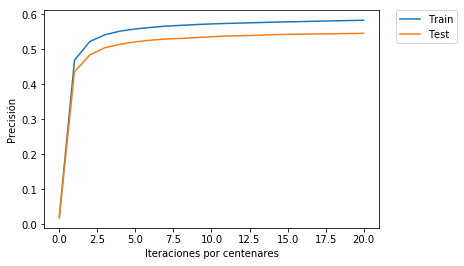

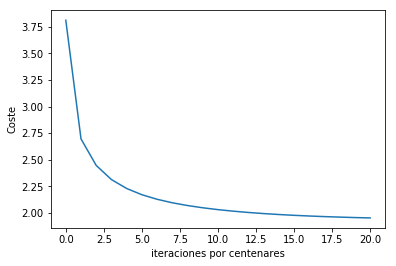

In [15]:
m1 = Model1()
train(m1, X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, 2000, imprimir=True)

In [12]:
for i in range(5):
    m1 = Model1()
    train(m1, X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, 500 , imprimir=False)

D:\ANACONDA\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Tensor("fully_connected/Relu:0", shape=(?, 43), dtype=float32)
 499, Loss: 1.732  Train accuracy: 0.657
 499, Loss: 1.881  Test accuracy: 0.610
Tensor("fully_connected/Relu:0", shape=(?, 43), dtype=float32)
 499, Loss: 1.763  Train accuracy: 0.651
 499, Loss: 1.926  Test accuracy: 0.604
Tensor("fully_connected/Relu:0", shape=(?, 43), dtype=float32)
 499, Loss: 2.038  Train accuracy: 0.575
 499, Loss: 2.175  Test accuracy: 0.539
Tensor("fully_connected/Relu:0", shape=(?, 43), dtype=float32)
 499, Loss: 1.568  Train accuracy: 0.702
 499, Loss: 1.756  Test accuracy: 0.643
Tensor("fully_connected/Relu:0", shape=(?, 43), dtype=float32)
 499, Loss: 1.853  Train accuracy: 0.616
 499, Loss: 2.063  Test accuracy: 0.556


### VISUALIZACIÓN DE LOS PESOS

In [16]:
def normalize(image):
    return (image-image.min())/(image.max()-image.min())

def display_images(images, titles=None, cols=5, interpolation=None):
    """ 
    images: A list of images. It can be either:
        + A list of Numpy arrays. Each array represents an image.
        + A list of lists of numpy arrays. In this casse, the images in the inner
          the inner lists are concatentated to make one image.
    
    """
    
    titles = titles or [""] * len(images)
    rows = math.ceil(len(images)/(cols))
    height_ratio =1.2*(rows/cols)*(0.5 if type(images[0]) is not np.ndarray else 1)
    plt.figure(figsize=(11,11 * height_ratio))
    i=1
    for image, title in zip(images, titles):
        plt.subplot(rows, cols, i)
        plt.axis("off")
        if type(image) is not np.ndarray:
            image = [normalize(g) for g in image]
            image = np.concatenate(image, axis=1)
        else:
            image = normalize(image)
        plt.title(title, fontsize = 9)
        plt.imshow(image, cmap="Greys_r", interpolation=interpolation)
        i += 1

In [17]:
#label_exemplars= [X_train_orig[np.where(Y_train_orig == l)][:][:] for l in range(62)]
label_exemplars =[]
for i in range(43):
    for w in range(len(Y_train_orig)):
        if Y_train_orig[w] == i:
            label_exemplars.append(X_train_orig[w])
            break
#label_counts = [np.count_nonzero(X_train_orig ==l ) for l in range(62)]
label_counts = []
for i in range(43):
    label_counts.append(0)
    for w in range(len(Y_train_orig)):
        if Y_train_orig[w] == i:
            label_counts[i] = label_counts[i]+1

In [18]:
# Loop trough the graph and print the names and shapes of all trainable variables
with m1.graph.as_default():
    for v in tf.trainable_variables():
        print(v.name, v.get_shape())

fully_connected/weights:0 (3072, 43)
fully_connected/biases:0 (43,)


In [20]:
#Get the values of the weight and bias variables.
m1_weights=m1.session.run("fully_connected/weights:0")
m1_biases=m1.session.run("fully_connected/biases:0")
print("weights shape: {!s:10}    min: {:.4f}    max: {:.4f}".format(m1_weights.shape, m1_weights.min(), m1_weights.max()))
print("biases shape: {!s:10}    min: {:.4f}    max: {:.4f}".format(m1_biases.shape, m1_biases.min(), m1_biases.max()))
print(m1_weights)

weights shape: (3072, 43)    min: -1.1024    max: 1.1690
biases shape: (43,)         min: -0.1785    max: 1.4742
[[-0.02577288  0.099213   -0.07724005 ...  0.00369318 -0.03687607
   0.03027744]
 [-0.04591391 -0.04996885 -0.06663572 ... -0.02076868 -0.02000419
  -0.02590018]
 [ 0.02255118 -0.06648074 -0.1035443  ... -0.00170148  0.02314573
   0.02042074]
 ...
 [ 0.03778275  0.17679682 -0.17304315 ... -0.00044052 -0.00273667
   0.01397659]
 [ 0.03130509 -0.03840313 -0.03889263 ... -0.0189422  -0.00509025
   0.00139753]
 [-0.0286226  -0.04876544  0.01040353 ... -0.0312996  -0.00154015
  -0.00583815]]


In [21]:
def display_weights(weights, limit):
    titles= ["Categoría {}  ({})".format(l,c) for l, c in enumerate(label_counts)]
    images = list(zip(label_exemplars, weights.T.reshape(-1, 32, 32,3)))
    display_images(images[:limit], titles)

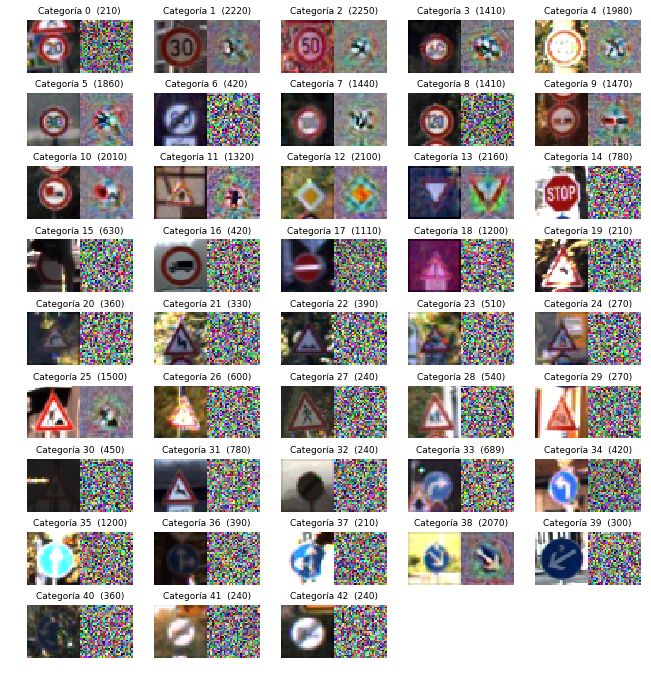

In [22]:
# Display weights of the first 30 labels
display_weights(m1_weights, 62)

Vamos a echar un vistazo a los histogramas

In [48]:
def display_histograms(weights, title):
    cols = 5
    rows = math.ceil(len(weights[0])/(cols))
    height_ratio =1.2*(rows/cols)*(0.5 if type(weights[0]) is not np.ndarray else 1)
    plt.figure(figsize=(14,14 * 1))
    for i in range(len(weights[0])):
        plt.subplot(rows,cols,i+1)
        w = weights[:,i]
        plt.title(title[i], fontsize=12)
        plt.tick_params(labelsize=6)
        plt.yticks([])
        plt.xticks([w.min(),w.max()])
        plt.hist(w, bins=62)
    plt.tight_layout()

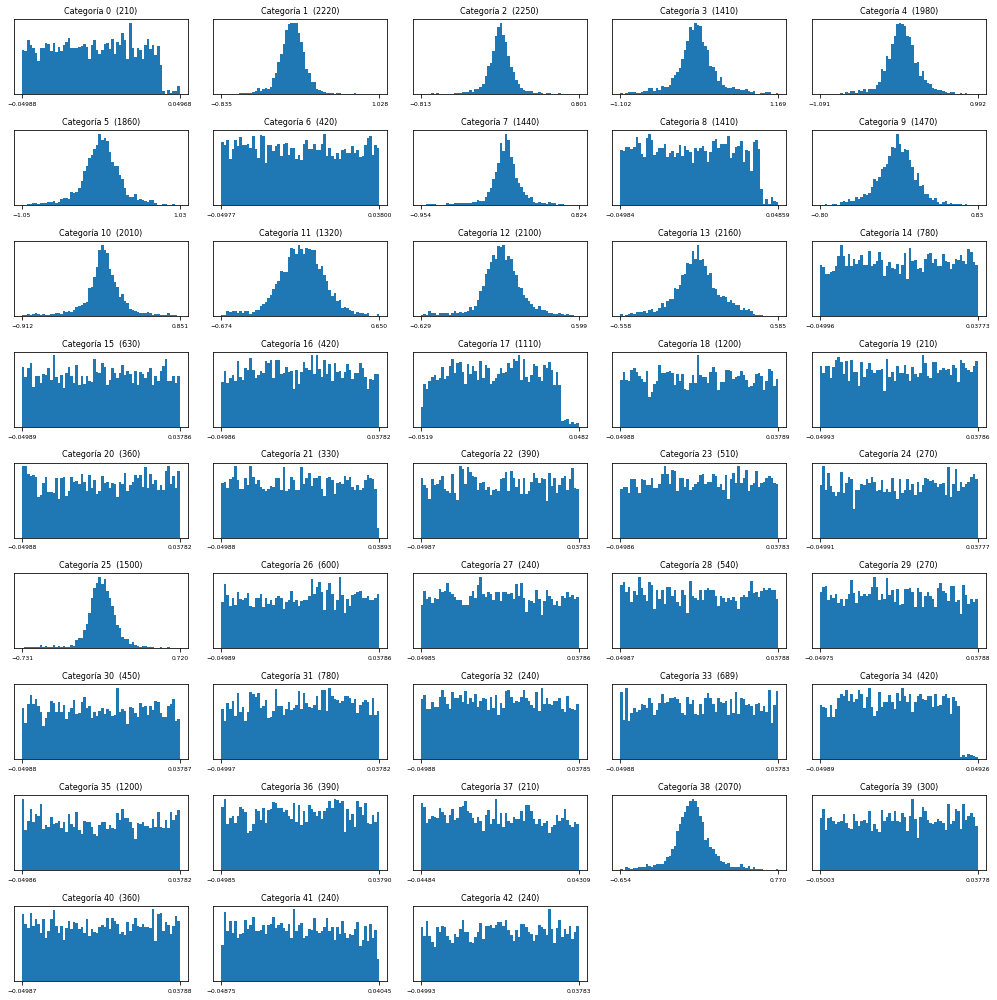

In [24]:
titles= ["Categoría {}  ({})".format(l,c) for l, c in enumerate(label_counts)]
display_histograms(m1_weights, titles)

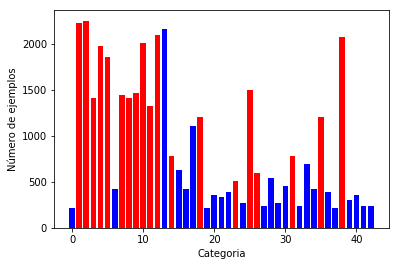

In [25]:
labels_count_x=list(range(43))
labels_count_y=label_counts
categorías_buenas = [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 18, 23, 25, 26, 31, 35, 38]
colores = []
for i in range(43):
    colores.append('blue')
for i in categorías_buenas:
    colores[i]='red'


plt.bar(labels_count_x,labels_count_y,color=colores)
plt.xlabel('Categoria')
plt.ylabel('Número de ejemplos')
plt.show()

## CONFUSSION MATRIX

In [26]:
print(__doc__)

#import sklearn
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Automatically created module for IPython interactive environment


In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[  0  36   0 ...   0   0   0]
 [  1 624  31 ...   0   0   0]
 [  1  68 632 ...   0   0   0]
 ...
 [ 35   0  12 ...   0   0   0]
 [  0   0   1 ...   0   0   0]
 [ 10   7   9 ...   0   0   0]]


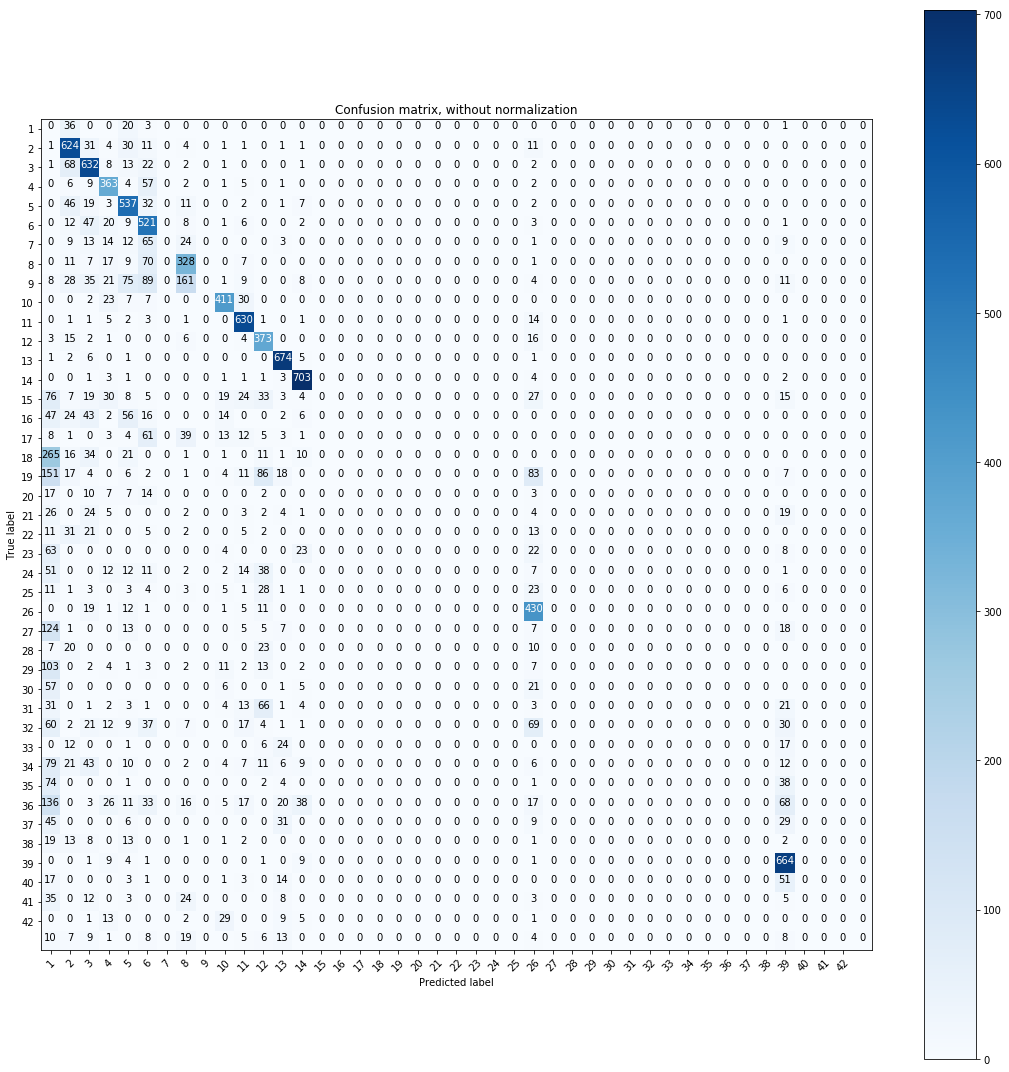

In [28]:
y_pred, _ = m1.session.run([m1.predicted_labels, m1.loss],
                                       {m1.images: X_test_orig, m1.labels:Y_test_orig})

y_test = Y_test_orig

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

class_names= list(range(1,43))

#Plot non-normalized confusion matrix
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

## PORCENTAJE DE ACIERTOS

In [50]:
def display_aciertos(images, titles=None, cols=5, interpolation=None):
    """ 
    images: A list of images. It can be either:
        + A list of Numpy arrays. Each array represents an image.
        + A list of lists of numpy arrays. In this casse, the images in the inner
          the inner lists are concatentated to make one image.
    
    """
    
    titles = titles or [""] * len(images)
    rows = math.ceil(len(images)/(cols))
    height_ratio =1.2*(rows/cols)*(0.5 if type(images[0]) is not np.ndarray else 1)
    plt.figure(figsize=(11,11 * height_ratio))
    i=1
    for image, title in zip(images, titles):
        plt.subplot(rows, cols, i)
        plt.axis("off")
        if type(image) is not np.ndarray:
            image = [normalize(g) for g in image]
            image = np.concatenate(image, axis=1)
        else:
            image = normalize(image)
        plt.title(title, fontsize = 12)
        plt.imshow(image, cmap="Greys_r", interpolation=interpolation)
        i += 1

In [51]:
label_exemplars_test =[]
for i in range(43):
    for w in range(len(Y_test_orig)):
        if Y_test_orig[w] == i:
            label_exemplars_test.append(X_test_orig[w])
            break

In [52]:
label_count_test = []
for i in range(43):
    label_count_test.append(0)
    for w in range(len(Y_test_orig)):
        if Y_test_orig[w] == i:
            label_count_test[i] = label_count_test[i]+1

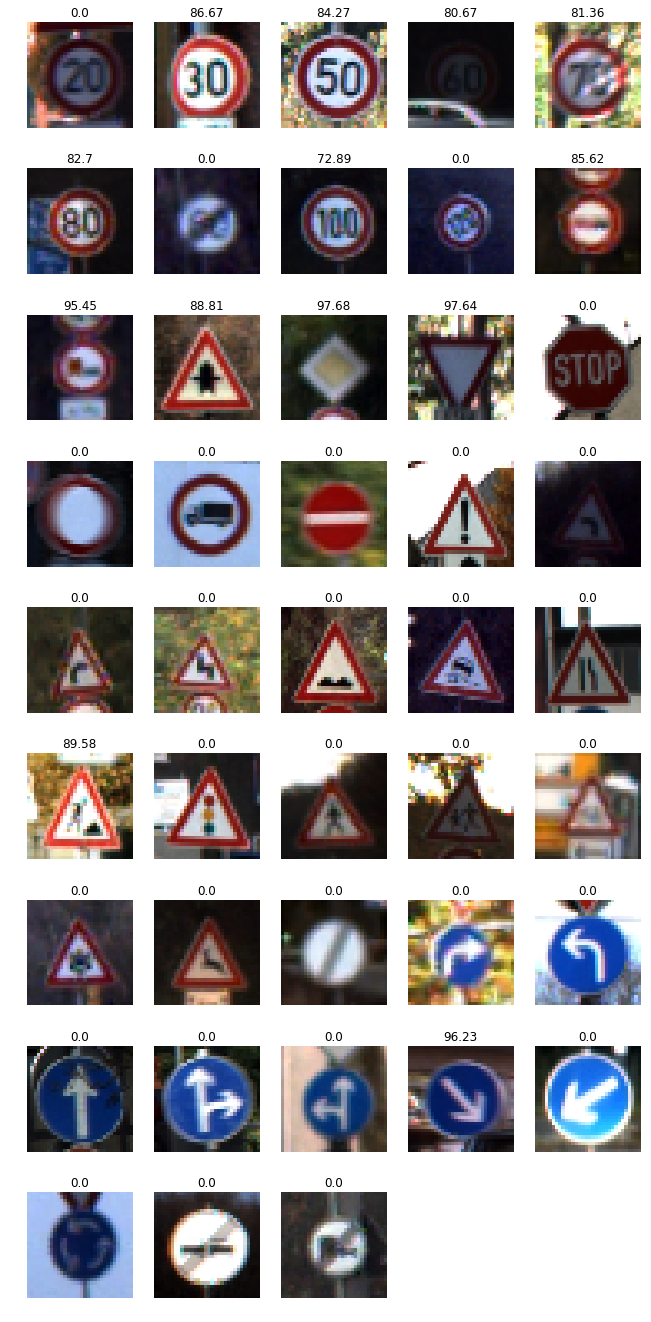

In [53]:
aciertos = [(round(cnf_matrix[i,i]/label_count_test[i]*100,2)) for i in range(43)]
display_aciertos(label_exemplars_test, aciertos)

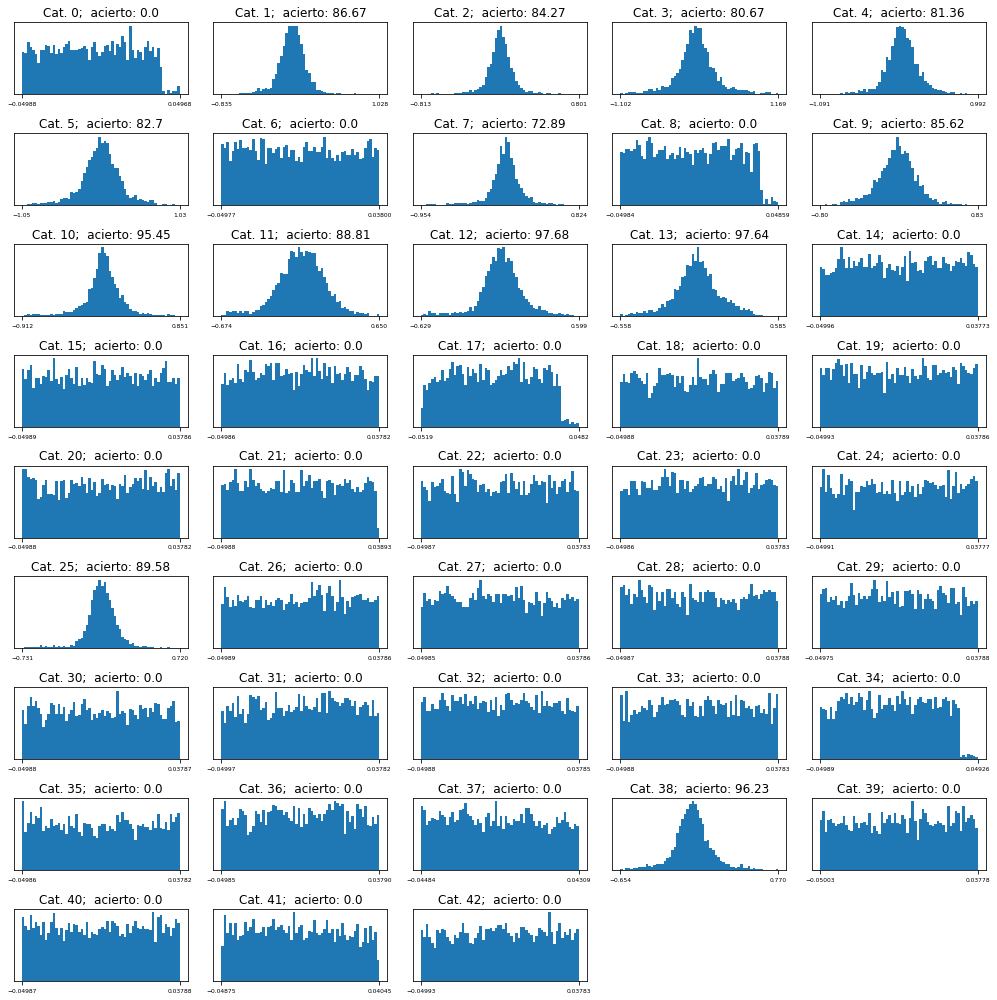

In [54]:
titles_aciertos = []
for i in range(43):
    titles_aciertos.append("Cat. "+str(i)+";  acierto: "+str(aciertos[i]))
    
#print(titles_aciertos)
display_histograms(m1_weights, titles_aciertos)

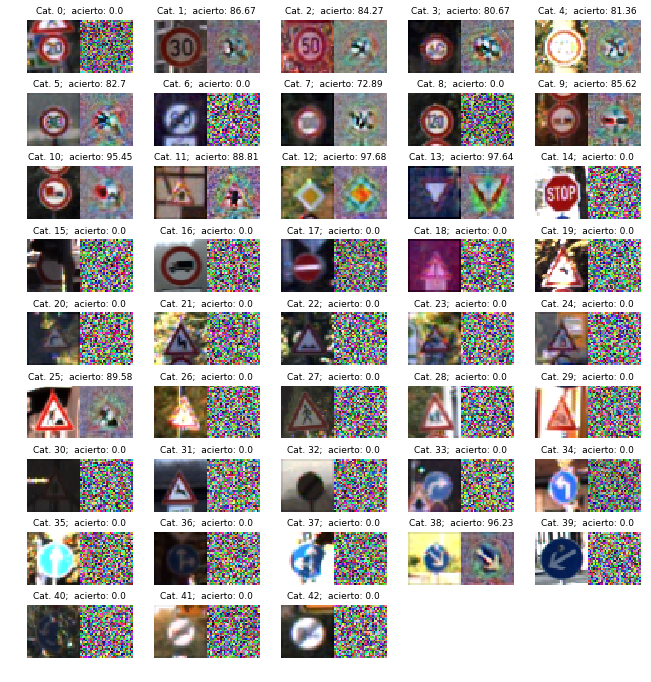

In [55]:
def display_weights(weights, limit):
    images = list(zip(label_exemplars, weights.T.reshape(-1, 32, 32,3)))
    display_images(images[:limit], titles_aciertos)
    
display_weights(m1_weights, 62)